In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import nglview as nv
import plumed

In [5]:
colvars = plumed.read_as_pandas('../001_RMSDBound/COLVAR')
colvars.columns

/tmp/ipykernel_14067/3239297804.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  colvars = plumed.read_as_pandas('../001_RMSDBound/COLVAR')
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++
+++ File /home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so does not exist or cannot be read


Index(['time', 'rmsd', 'uwall-rmsd.bias', 'uwall-rmsd.force2',
       'lwall-rmsd.bias', 'lwall-rmsd.force2', 'meta_rmsd.bias', 'd1',
       'translation.bias', 'translation.force2', 'rot_q.w', 'rot_q.x',
       'rot_q.y', 'rot_q.z', 'orientation.bias', 'orientation.force2'],
      dtype='object')

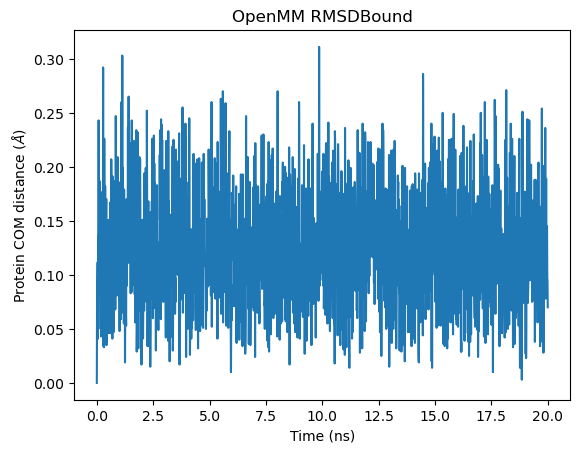

In [3]:
cv = colvars['d1']
time = colvars['time'] 
plt.plot(time/1000-10, cv*10)
plt.xlabel('Time (ns)')
plt.ylabel(r'Protein COM distance (${\AA}$)')
plt.title('OpenMM RMSDBound')
plt.savefig('figures/rmsdbound_d1.png')

0.1156


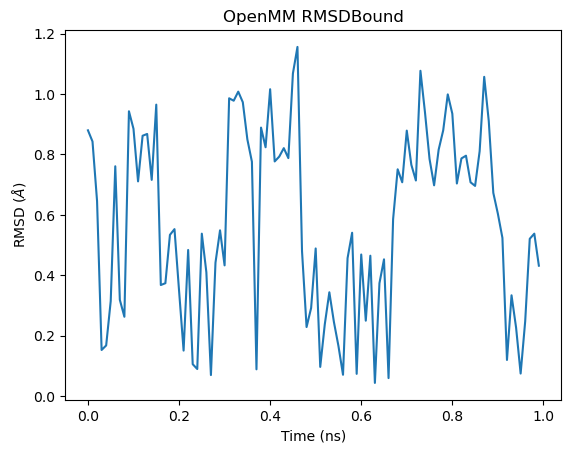

In [6]:
cv = colvars['rmsd']
time = colvars['time']
print(np.max(cv))
plt.plot(time/1000 - 10, cv*10)
plt.xlabel('Time (ns)')
plt.ylabel(r'RMSD (${\AA}$)')
plt.title('OpenMM RMSDBound')
plt.savefig('figures/rmsdbound_rmsd.png')

fps min -112.7558


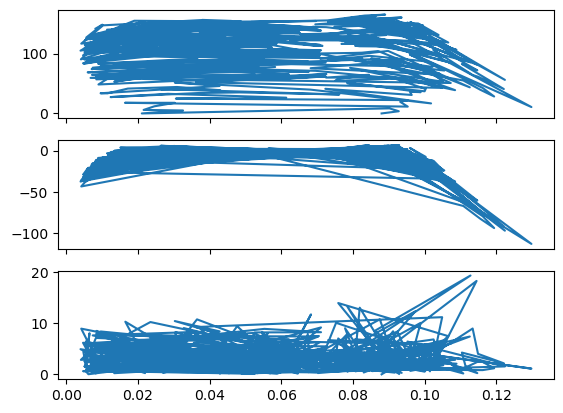

In [33]:
# Index(['time', 'rmsd', 'uwall-rmsd.bias', 'uwall-rmsd.force2',
#        'lwall-rmsd.bias', 'lwall-rmsd.force2', 'meta_rmsd.bias',
#        'meta_rmsd.rbias', 'meta_rmsd.rct', 'd1', 'translation.bias',
#        'translation.force2', 'rot_q.w', 'rot_q.x', 'rot_q.y', 'rot_q.z',
#        'orientation.bias', 'orientation.force2'],
#       dtype='object')

cv = colvars['meta_rmsd.bias']
fps_lp = colvars['meta_rmsd.rbias']
fps_ld =colvars['translation.bias']
print("fps min", np.min(fps_lp))
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True)
ax1.plot(time, cv)
ax2.plot(time, fps_lp)
ax3.plot(time,fps_ld)
plt.savefig('all_cvs.png')